In [1]:
import pandas as pd
import re

# Read Eyras Lab Data - Sandelin Lab Data and Kahraman Lab Data

In [2]:
## Read Eyras Lab Data
mmc2_Isoforms = pd.read_table("mmc2.csv", sep=',')
mmc2_Isoforms = mmc2_Isoforms.iloc[:,[1,2,3,14]]
print(mmc2_Isoforms)

         Symbol Normal_transcript Tumor_transcript  \
0     C14orf129        uc001yfj.3       uc001yfl.2   
1        LEFTY1        uc001hpo.2       uc010pvj.1   
2       TMEM156        uc010ifj.2       uc003gto.2   
3          MYL6        uc001sjw.1       uc001sjx.1   
4       FAM19A5        uc003bim.3       uc003bio.3   
...         ...               ...              ...   
8117    CCDC107        uc011loy.1       uc003zxk.2   
8118      PTPN3        uc011lwh.1       uc011lwg.1   
8119      LCN10        uc011mef.1       uc011med.1   
8120        IDS        uc011mxe.1       uc010nsu.1   
8121        IDS        uc011mxf.1       uc004fcw.3   

                                  Tumors  
0          kich;lihc;luad;lusc;prad;thca  
1                    brca;hnsc;kich;lusc  
2     brca;coad;hnsc;kich;lihc;lusc;thca  
3                         brca;kirc;luad  
4     hnsc;kich;kirp;lihc;luad;lusc;prad  
...                                  ...  
8117                                lusc  
8118   

In [3]:
## Make different rows from each gene:cancer pair in mmc2 data
Eyras_Lab_Data = pd.DataFrame()
Eyras_Lab_Dataset = pd.DataFrame()
for lineNumber in range(0, len(mmc2_Isoforms.iloc[:,0])):
    cancer_type = mmc2_Isoforms.iloc[lineNumber, 3].split(";")
    for n in range(0,(len(cancer_type))):
        cancer_type_2 = cancer_type[n]
        Symbol = mmc2_Isoforms.iloc[lineNumber,0]
        Normal_isoform = re.sub(r'\.\d*', '', mmc2_Isoforms.iloc[lineNumber,1])
        Tumor_isoform = re.sub(r'\.\d*', '', mmc2_Isoforms.iloc[lineNumber,2])
        data = {'Symbol':[Symbol], 'Normal_isoform':[Normal_isoform],'Tumor_isoform':[Tumor_isoform],'cancer_type':[cancer_type_2]}
        Eyras_Lab_Data = pd.DataFrame(data)
        Eyras_Lab_Dataset = pd.concat([Eyras_Lab_Dataset,Eyras_Lab_Data], axis=0)
        
print(Eyras_Lab_Dataset)

       Symbol Normal_isoform Tumor_isoform cancer_type
0   C14orf129       uc001yfj      uc001yfl        kich
0   C14orf129       uc001yfj      uc001yfl        lihc
0   C14orf129       uc001yfj      uc001yfl        luad
0   C14orf129       uc001yfj      uc001yfl        lusc
0   C14orf129       uc001yfj      uc001yfl        prad
..        ...            ...           ...         ...
0       PTPN3       uc011lwh      uc011lwg        thca
0       LCN10       uc011mef      uc011med        kirc
0       LCN10       uc011mef      uc011med        thca
0         IDS       uc011mxe      uc010nsu        coad
0         IDS       uc011mxf      uc004fcw        kirp

[37476 rows x 4 columns]


In [4]:
## Read Sandelin Lab Data
Sandelin_Lab_Isoforms = pd.read_table("Sandelin_Lab_TableS2_Isoforms.txt", sep='\t')
Sandelin_Lab_Isoforms = Sandelin_Lab_Isoforms.iloc[:,[0,1,3,4,5]]
Sandelin_Lab_Isoforms

,isoformUpregulated,isoformDownregulated,gene_name,condition_1,condition_2
0,uc001aqu.2,uc001aqr.3,UBE4B,THCA_ctrl,THCA_cancer
1,uc001aqv.3,uc001aqw.3,KIF1B,KIRC_ctrl,KIRC_cancer
2,uc001aqv.3,uc001aqw.3,KIF1B,KIRC_ctrl,KIRC_cancer
3,uc001ara.2,uc001aqv.3,KIF1B,PRAD_ctrl,PRAD_cancer
4,uc001ara.2,uc001aqv.3,KIF1B,PRAD_ctrl,PRAD_cancer
...,...,...,...,...,...
8201,uc004egc.2,uc004ege.3,SYTL4,KIRC_ctrl,KIRC_cancer
8202,uc004fuf.2,uc004fug.2,KDM5D,HNSC_ctrl,HNSC_cancer
8203,uc004fuf.2,uc004fug.2,KDM5D,HNSC_ctrl,HNSC_cancer
8204,uc004fuf.2,uc004fug.2,KDM5D,KIRC_ctrl,KIRC_cancer


In [5]:
## Delete number after '.' in ucsc numbers
Sandelin_Lab_Dataset = pd.DataFrame()
for lineNumber in range(0, len(Sandelin_Lab_Isoforms.iloc[:,0])):
    isoformDownregulated = re.sub(r'\.\d*', '', Sandelin_Lab_Isoforms.iloc[lineNumber,1])
    isoformUpregulated = re.sub(r'\.\d*', '', Sandelin_Lab_Isoforms.iloc[lineNumber,0])
    data = {'isoformDownregulated':[isoformDownregulated],'isoformUpregulated':[isoformUpregulated],'gene_name':Sandelin_Lab_Isoforms.iloc[lineNumber,2],'condition_1':Sandelin_Lab_Isoforms.iloc[lineNumber,3],'condition_2':Sandelin_Lab_Isoforms.iloc[lineNumber,4]}
    Sandelin_Lab_Isoforms_new = pd.DataFrame(data)
    Sandelin_Lab_Dataset = pd.concat([Sandelin_Lab_Dataset,Sandelin_Lab_Isoforms_new], axis=0)

In [6]:
print(Sandelin_Lab_Dataset)

   isoformDownregulated isoformUpregulated gene_name condition_1  condition_2
0              uc001aqr           uc001aqu     UBE4B   THCA_ctrl  THCA_cancer
0              uc001aqw           uc001aqv     KIF1B   KIRC_ctrl  KIRC_cancer
0              uc001aqw           uc001aqv     KIF1B   KIRC_ctrl  KIRC_cancer
0              uc001aqv           uc001ara     KIF1B   PRAD_ctrl  PRAD_cancer
0              uc001aqv           uc001ara     KIF1B   PRAD_ctrl  PRAD_cancer
..                  ...                ...       ...         ...          ...
0              uc004ege           uc004egc     SYTL4   KIRC_ctrl  KIRC_cancer
0              uc004fug           uc004fuf     KDM5D   HNSC_ctrl  HNSC_cancer
0              uc004fug           uc004fuf     KDM5D   HNSC_ctrl  HNSC_cancer
0              uc004fug           uc004fuf     KDM5D   KIRC_ctrl  KIRC_cancer
0              uc004fug           uc004fuf     KDM5D   KIRC_ctrl  KIRC_cancer

[8206 rows x 5 columns]


In [7]:
#Read Kahraman Lab Data
Kahraman_Isoforms = pd.read_table("Kahraman_Lab_Dataset_Isoform_Gene", sep='\t')
Kahraman_Isoforms

,#Tissue,DomCancerTrans,GTExMDIs,GeneName1
0,Bladder/Bladder-TCC,ENST00000440416,ENST00000337248:9,STPG1
1,Bladder/Bladder-TCC,ENST00000402746,ENST00000399654:7,MAD1L1
2,Bladder/Bladder-TCC,ENST00000539143,ENST00000000412:8,M6PR
3,Bladder/Bladder-TCC,ENST00000539143,ENST00000000412:8,M6PR
4,Bladder/Bladder-TCC,ENST00000360132,ENST00000286186:9,CASP10
...,...,...,...,...
234191,Uterus/Uterus-AdenoCA,ENST00000396904,ENST00000407184:32,RBAK-RBAKDN
234192,Uterus/Uterus-AdenoCA,ENST00000396904,ENST00000407184:32,RBAK-RBAKDN
234193,Uterus/Uterus-AdenoCA,ENST00000396904,ENST00000407184:32,RBAK-RBAKDN
234194,Uterus/Uterus-AdenoCA,ENST00000396904,ENST00000407184:32,RBAK-RBAKDN


In [8]:
# Delete ':' in GTExMDIs and if there is two ENST in GTExMDIs, split them into rows
Kahraman_Lab_Dataset = pd.DataFrame()
new = pd.DataFrame()
for lineNumber in range(0, len(Kahraman_Isoforms.iloc[:,0])):
    GTExMDIs_type = Kahraman_Isoforms.iloc[lineNumber, 2].split(',')
    for n in range(0,(len(GTExMDIs_type))):
        GTExMDIs_type2 = GTExMDIs_type[n]
        GTExMDIs = re.sub(r':\d*', '', GTExMDIs_type2)
        data = {'GTExMDIs':[GTExMDIs],'DomCancerIso':Kahraman_Isoforms.iloc[lineNumber,1],'Tissue':Kahraman_Isoforms.iloc[lineNumber,0], 'GeneName1':Kahraman_Isoforms.iloc[lineNumber,3]}
        new = pd.DataFrame(data)
        Kahraman_Lab_Dataset = pd.concat([Kahraman_Lab_Dataset,new], axis=0)
        
print(Kahraman_Lab_Dataset)

           GTExMDIs     DomCancerIso                 Tissue    GeneName1
0   ENST00000337248  ENST00000440416    Bladder/Bladder-TCC        STPG1
0   ENST00000399654  ENST00000402746    Bladder/Bladder-TCC       MAD1L1
0   ENST00000000412  ENST00000539143    Bladder/Bladder-TCC         M6PR
0   ENST00000000412  ENST00000539143    Bladder/Bladder-TCC         M6PR
0   ENST00000286186  ENST00000360132    Bladder/Bladder-TCC       CASP10
..              ...              ...                    ...          ...
0   ENST00000407184  ENST00000396904  Uterus/Uterus-AdenoCA  RBAK-RBAKDN
0   ENST00000407184  ENST00000396904  Uterus/Uterus-AdenoCA  RBAK-RBAKDN
0   ENST00000407184  ENST00000396904  Uterus/Uterus-AdenoCA  RBAK-RBAKDN
0   ENST00000407184  ENST00000396904  Uterus/Uterus-AdenoCA  RBAK-RBAKDN
0   ENST00000407184  ENST00000396904  Uterus/Uterus-AdenoCA  RBAK-RBAKDN

[250739 rows x 4 columns]


In [9]:
## CancerName in different Datasets
CancerNames = pd.read_table("Datasets.txt", sep='\t')
CancerNames

,Denmark,mmc2,Kahraman
0,BRCA_cancer,brca,Breast/Breast-AdenoCA
1,COAD_cancer,coad,Colon/ColoRect-AdenoCA
2,HNSC_cancer,hnsc,-
3,KICH_cancer,kich,Kidney/Kidney-ChRCC
4,KIRC_cancer,kirc,Kidney/Kidney-RCC
5,KIRP_cancer,kirp,-
6,LIHC_cancer,lihc,Liver/Liver-HCC
7,LUAD_cancer,luad,Lung/Lung-AdenoCA
8,LUSC_cancer,lusc,Lung/Lung-SCC
9,PRAD_cancer,prad,Prostate/Prost-AdenoCA


In [10]:
## Change Kahraman_Lab_Data CancerName
Kahraman_Lab_Dataset.iloc[:,2][Kahraman_Lab_Dataset.iloc[:,2] == 'Breast/Breast-AdenoCA'] = "BRCA_cancer"
Kahraman_Lab_Dataset.iloc[:,2][Kahraman_Lab_Dataset.iloc[:,2] == 'Colon/ColoRect-AdenoCA'] = "COAD_cancer"
Kahraman_Lab_Dataset.iloc[:,2][Kahraman_Lab_Dataset.iloc[:,2] == 'Kidney/Kidney-ChRCC'] = "KICH_cancer"
Kahraman_Lab_Dataset.iloc[:,2][Kahraman_Lab_Dataset.iloc[:,2] == 'Liver/Liver-HCC'] = "LIHC_cancer"
Kahraman_Lab_Dataset.iloc[:,2][Kahraman_Lab_Dataset.iloc[:,2] == 'Lung/Lung-AdenoCA'] = "LUAD_cancer"
Kahraman_Lab_Dataset.iloc[:,2][Kahraman_Lab_Dataset.iloc[:,2] == 'Lung/Lung-SCC'] = "LUSC_cancer"
Kahraman_Lab_Dataset.iloc[:,2][Kahraman_Lab_Dataset.iloc[:,2] == 'Prostate/Prost-AdenoCA'] = "PRAD_cancer"
Kahraman_Lab_Dataset.iloc[:,2][Kahraman_Lab_Dataset.iloc[:,2] == 'Stomach/Stomach-AdenoCA'] = "STAD_cancer"
Kahraman_Lab_Dataset.iloc[:,2][Kahraman_Lab_Dataset.iloc[:,2] == 'Thyroid/Thy-AdenoCA'] = "THCA_cancer"
Kahraman_Lab_Dataset.iloc[:,2][Kahraman_Lab_Dataset.iloc[:,2] == 'Kidney/Kidney-RCC'] = "KIRC_cancer"

In [11]:
## Change Eyras_Lab_Data CancerName
Eyras_Lab_Dataset.iloc[:,3][Eyras_Lab_Dataset.iloc[:,3] == 'brca'] = "BRCA_cancer"
Eyras_Lab_Dataset.iloc[:,3][Eyras_Lab_Dataset.iloc[:,3] == 'coad'] = "COAD_cancer"
Eyras_Lab_Dataset.iloc[:,3][Eyras_Lab_Dataset.iloc[:,3] == 'kich'] = "KICH_cancer"
Eyras_Lab_Dataset.iloc[:,3][Eyras_Lab_Dataset.iloc[:,3] == 'lihc'] = "LIHC_cancer"
Eyras_Lab_Dataset.iloc[:,3][Eyras_Lab_Dataset.iloc[:,3] == 'luad'] = "LUAD_cancer"
Eyras_Lab_Dataset.iloc[:,3][Eyras_Lab_Dataset.iloc[:,3] == 'lusc'] = "LUSC_cancer"
Eyras_Lab_Dataset.iloc[:,3][Eyras_Lab_Dataset.iloc[:,3] == 'prad'] = "PRAD_cancer"
Eyras_Lab_Dataset.iloc[:,3][Eyras_Lab_Dataset.iloc[:,3] == 'stad'] = "STAD_cancer"
Eyras_Lab_Dataset.iloc[:,3][Eyras_Lab_Dataset.iloc[:,3] == 'thca'] = "THCA_cancer"
Eyras_Lab_Dataset.iloc[:,3][Eyras_Lab_Dataset.iloc[:,3] == 'kirc'] = "KIRC_cancer"
Eyras_Lab_Dataset.iloc[:,3][Eyras_Lab_Dataset.iloc[:,3] == 'kirp'] = "KIRP_cancer"

In [12]:
## Make columnNames same
Kahraman_Lab_Dataset.columns = ['Normal_Isoform','Cancer_Isoform','Cancer_Type','Gene_Name']
Sandelin_Lab_Dataset.columns = ['Normal_Isoform', 'Cancer_Isoform','Gene_Name','Condition1','Cancer_Type']
Eyras_Lab_Dataset.columns = ['Gene_Name','Normal_isoform','Cancer_Isoform','Cancer_Type']

# Gene Overlap Comparison

In [13]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib_venn import venn2

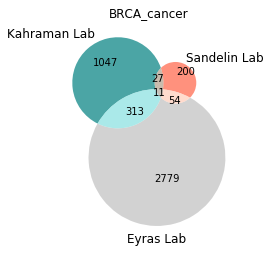

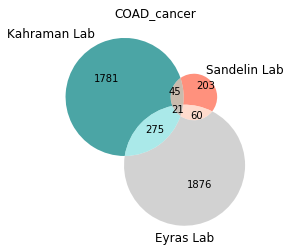

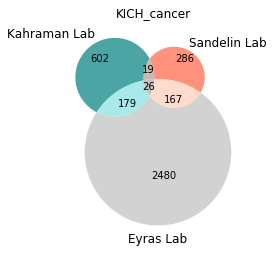

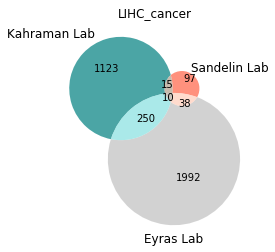

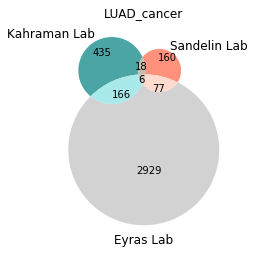

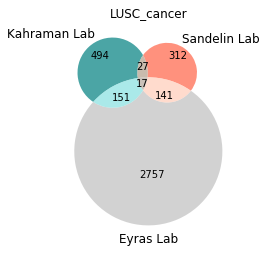

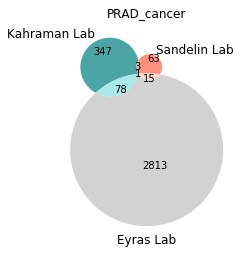

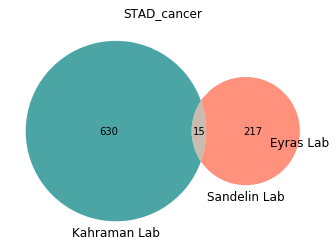

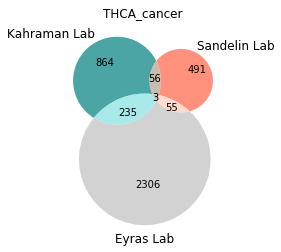

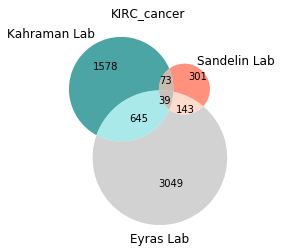

In [33]:
#Calculate overlaping genes among 3 datasets for all cancer types
cancer_types = ['BRCA_cancer','COAD_cancer','KICH_cancer','LIHC_cancer','LUAD_cancer','LUSC_cancer','PRAD_cancer','STAD_cancer','THCA_cancer','KIRC_cancer']

for cancer in cancer_types:
    a = Kahraman_Lab_Dataset.loc[Kahraman_Lab_Dataset.iloc[:,2] == cancer].drop_duplicates()
    b = Sandelin_Lab_Dataset.loc[Sandelin_Lab_Dataset.iloc[:,4] == cancer].drop_duplicates()
    c = Eyras_Lab_Dataset.loc[Eyras_Lab_Dataset.iloc[:,3] == cancer].drop_duplicates()
    venn3([set(a.iloc[:,3]), set(b.iloc[:,2]), set(c.iloc[:,0])], 
          set_labels = ('Kahraman Lab', 'Sandelin Lab', 'Eyras Lab'),
          set_colors=('teal', 'tomato', 'silver'), alpha = 0.7)
    plt.title(cancer)
    plt.show()

# Cancer Isoform Overlap Comparison

In [15]:
## ENST UCSC ID Mapping from UCSC database
ENST_UCSC_ids = pd.read_table("knownGene_ucsc_enst", sep=' ')
ENST_UCSC_ids.columns = ['ENSTID','UCSCID']
ENST_UCSC_ids

,ENSTID,UCSCID
0,ENST00000473358,uc057aty
1,ENST00000469289,uc057atz
2,ENST00000607096,uc031tlb
3,ENST00000417324,uc001aak
4,ENST00000461467,uc057aua
...,...,...
247535,ENST00000643054,uc287gcw
247536,ENST00000647527,uc287gcx
247537,ENST00000644360,uc287gcy
247538,ENST00000645951,uc287gcz


In [16]:
ENST_UCSC_ids.columns = ['Cancer_Isoform','UCSCID']
Kahraman_Isoform_Cancer = Kahraman_Lab_Dataset.merge(ENST_UCSC_ids, on='Cancer_Isoform', how='inner')
Kahraman_Isoform_Cancer.columns = ['Normal_Isoform','Cancer_Isoform_ENST','Cancer_Type','Gene_Name', 'Cancer_Isoform']

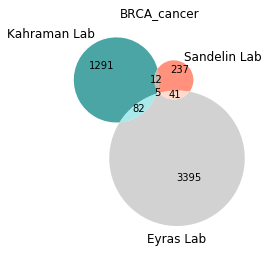

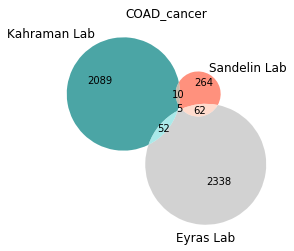

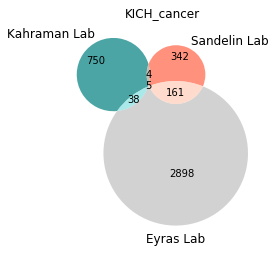

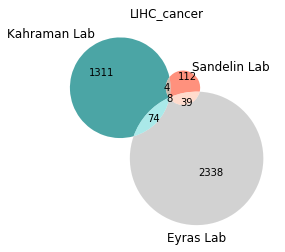

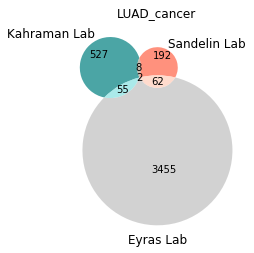

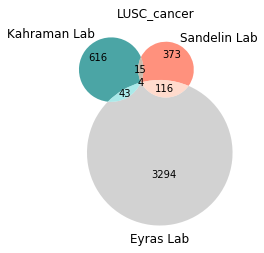

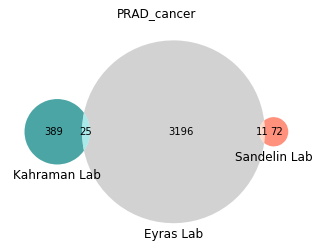

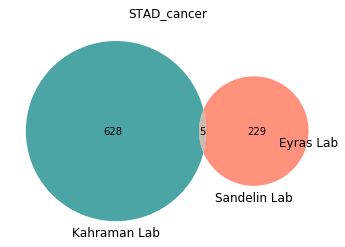

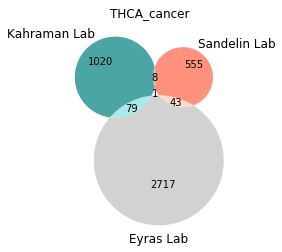

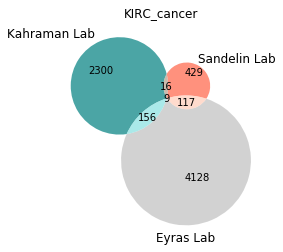

In [24]:
for cancer in cancer_types:
    
    a = Kahraman_Isoform_Cancer.loc[Kahraman_Isoform_Cancer.iloc[:,2] == cancer].drop_duplicates()
    b = Sandelin_Lab_Dataset.loc[Sandelin_Lab_Dataset.iloc[:,4] == cancer].drop_duplicates()
    c = Eyras_Lab_Dataset.loc[Eyras_Lab_Dataset.iloc[:,3] == cancer].drop_duplicates()
    venn3([set(a.iloc[:,4]), set(b.iloc[:,1]), set(c.iloc[:,2])], 
          set_labels = ('Kahraman Lab', 'Sandelin Lab', 'Eyras Lab'),
          set_colors=('teal', 'tomato', 'silver'), alpha = 0.7)
    plt.title(cancer)
    plt.show()

# Normal Isoform Overlap Comparison

In [18]:
ENST_UCSC_ids.columns = ['Normal_Isoform','UCSCID']
Kahraman_Isoform_Normal = Kahraman_Lab_Dataset.merge(ENST_UCSC_ids, on='Normal_Isoform', how='inner')
Kahraman_Isoform_Normal.columns = ['Normal_Isoform_ENST','Cancer_Isoform_ENST','Cancer_Type','Gene_Name', 'Normal_Isoform']
Kahraman_Isoform_Normal

,Normal_Isoform_ENST,Cancer_Isoform_ENST,Cancer_Type,Gene_Name,Normal_Isoform
0,ENST00000337248,ENST00000440416,Bladder/Bladder-TCC,STPG1,uc001bjc
1,ENST00000337248,ENST00000440416,COAD_cancer,STPG1,uc001bjc
2,ENST00000337248,ENST00000440416,COAD_cancer,STPG1,uc001bjc
3,ENST00000337248,ENST00000440416,KIRC_cancer,STPG1,uc001bjc
4,ENST00000337248,ENST00000440416,KIRC_cancer,STPG1,uc001bjc
...,...,...,...,...,...
236968,ENST00000448265,ENST00000443097,Uterus/Uterus-AdenoCA,UPK3B,uc033ayz
236969,ENST00000448265,ENST00000443097,Uterus/Uterus-AdenoCA,UPK3B,uc033ayz
236970,ENST00000448265,ENST00000443097,Uterus/Uterus-AdenoCA,UPK3B,uc033ayz
236971,ENST00000529415,ENST00000533758,Uterus/Uterus-AdenoCA,LRRC24,uc003zdm


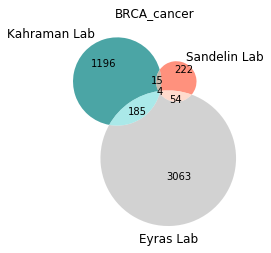

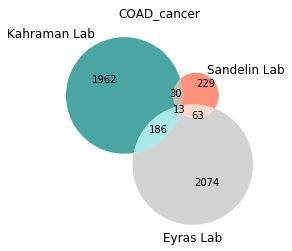

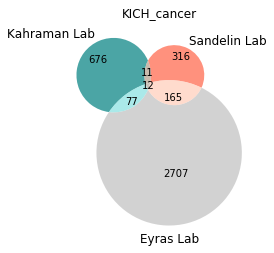

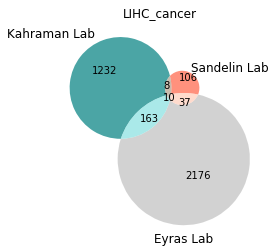

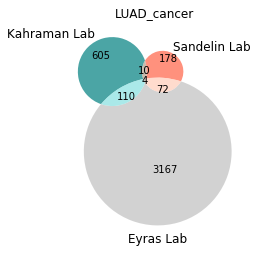

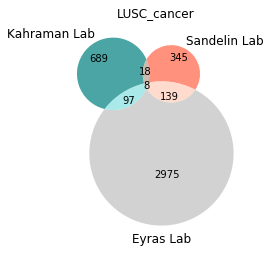

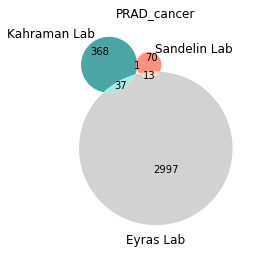

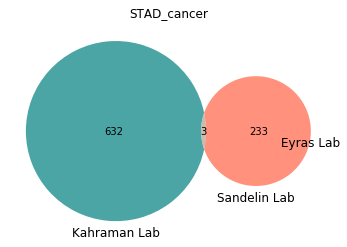

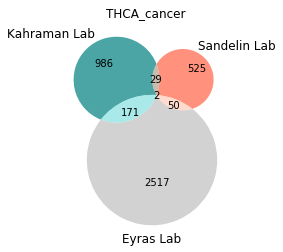

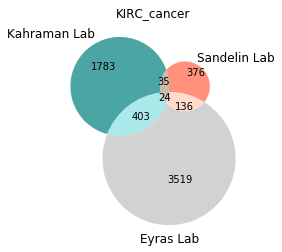

In [23]:
for cancer in cancer_types:
    
    a = Kahraman_Isoform_Normal.loc[Kahraman_Isoform_Normal.iloc[:,2] == cancer].drop_duplicates()
    b = Sandelin_Lab_Dataset.loc[Sandelin_Lab_Dataset.iloc[:,4] == cancer].drop_duplicates()
    c = Eyras_Lab_Dataset.loc[Eyras_Lab_Dataset.iloc[:,3] == cancer].drop_duplicates()
    
    venn3([set(a.iloc[:,4]), set(b.iloc[:,0]), set(c.iloc[:,1])], 
          set_labels = ('Kahraman Lab', 'Sandelin Lab', 'Eyras Lab'),
          set_colors=('teal', 'tomato', 'silver'), alpha = 0.7)
    plt.title(cancer)
    plt.show()

# Normal To Cancer Isoform Switch Comparison

In [20]:
## 
ENST_UCSC_ids.columns = ['Cancer_Isoform_ENST','UCSCID']
Kahraman_Isoform_Normal_Cancer = Kahraman_Isoform_Normal.merge(ENST_UCSC_ids, on='Cancer_Isoform_ENST', how='inner')
Kahraman_Isoform_Normal_Cancer.columns = ['Normal_Isoform_ENST','Cancer_Isoform_ENST','Cancer_Type','Gene_Name', 'Normal_Isoform', 'Cancer_Isoform']
Kahraman_Isoform_Normal_Cancer

,Normal_Isoform_ENST,Cancer_Isoform_ENST,Cancer_Type,Gene_Name,Normal_Isoform,Cancer_Isoform
0,ENST00000337248,ENST00000003583,LIHC_cancer,STPG1,uc001bjc,uc001bja
1,ENST00000337248,ENST00000003583,LIHC_cancer,STPG1,uc001bjc,uc001bja
2,ENST00000337248,ENST00000003583,Uterus/Uterus-AdenoCA,STPG1,uc001bjc,uc001bja
3,ENST00000337248,ENST00000003583,Uterus/Uterus-AdenoCA,STPG1,uc001bjc,uc001bja
4,ENST00000399654,ENST00000402746,Bladder/Bladder-TCC,MAD1L1,uc003slf,uc003sli
...,...,...,...,...,...,...
221587,ENST00000354384,ENST00000536551,Uterus/Uterus-AdenoCA,STMND1,uc063mas,uc021ymc
221588,ENST00000354384,ENST00000536551,Uterus/Uterus-AdenoCA,STMND1,uc063mas,uc021ymc
221589,ENST00000367639,ENST00000419909,Uterus/Uterus-AdenoCA,TEX35,uc001glw,uc057nom
221590,ENST00000529415,ENST00000533758,Uterus/Uterus-AdenoCA,LRRC24,uc003zdm,uc064rox


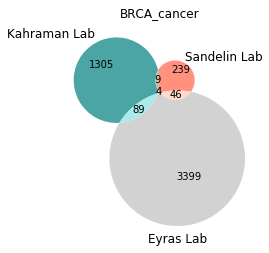

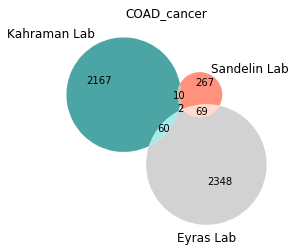

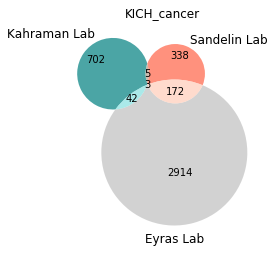

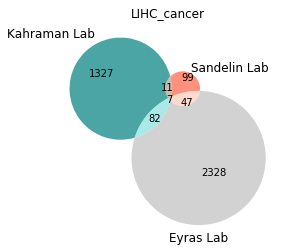

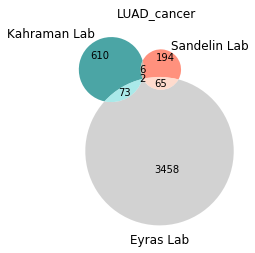

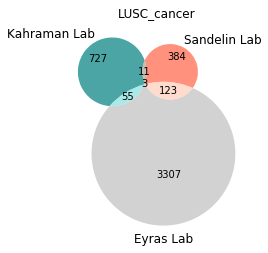

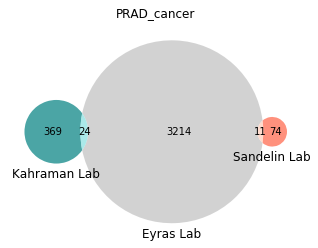

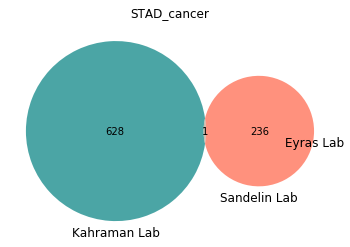

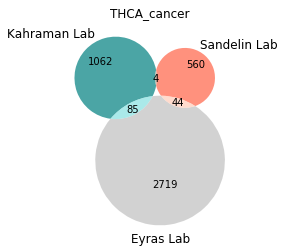

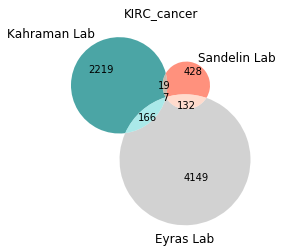

In [22]:
for cancer in cancer_types:
    
    a = Kahraman_Isoform_Normal_Cancer.loc[Kahraman_Isoform_Normal_Cancer.iloc[:,2] == cancer].drop_duplicates()
    b = Sandelin_Lab_Dataset.loc[Sandelin_Lab_Dataset.iloc[:,4] == cancer].drop_duplicates()
    c = Eyras_Lab_Dataset.loc[Eyras_Lab_Dataset.iloc[:,3] == cancer].drop_duplicates()
    
    a_c = a.iloc[:,[4,5]].merge(c.iloc[:,[1,2]])
    a_b = a.iloc[:,[4,5]].merge(b.iloc[:,[0,1]])
    b_c = c.iloc[:,[1,2]].merge(b.iloc[:,[0,1]])
    a_b_c = a.iloc[:,[4,5]].merge(c.iloc[:,[1,2]]).merge(b.iloc[:,[0,1]])
    
    
    venn3(subsets = ((len(a)-len(a_c)-len(a_b)-len(a_b_c)),
                     (len(b)-len(b_c)-len(a_b_c)-len(a_b)),
                     len(a_b), 
                     (len(c)-len(a_c)-len(b_c)-len(a_b_c)),
                     len(a_c),
                     len(b_c), len(a_b_c)), 
          set_labels = ('Kahraman Lab','Sandelin Lab','Eyras Lab'),
          set_colors=('teal', 'tomato', 'silver'), alpha = 0.7)
    plt.title(cancer)
    plt.show()